In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
%matplotlib inline

In [3]:
df1=pd.read_csv('mdbv2.csv',index_col=0)

In [4]:
df2=pd.read_csv('movie_subgenres.csv',index_col=0)

In [10]:
df1.reset_index(inplace=True)

In [6]:
df2.head()

,Date_Released,Lifetime_Gross,Title,Subgenre
0,"Dec 18, 2009",749766139,Avatar,Affliction
1,"Aug 3, 2007",227471070,The Bourne Ultimatum,Affliction
2,"Jul 23, 2004",176241941,The Bourne Supremacy,Affliction
3,"Feb 10, 2012",125014030,The Vow,Affliction
4,"Jun 14, 2002",121661683,The Bourne Identity,Affliction


In [11]:
df1.head()

,title,popularity,vote_count,mdb_id,vote_average,release_date,genre
0,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi
1,Avatar,60.213,20869,19995,7.4,2009-12-10,sci-fi
2,Star Wars: The Force Awakens,51.452,14128,140607,7.4,2015-12-15,sci-fi
3,Avengers: Infinity War,87.698,17541,299536,8.3,2018-04-25,sci-fi
4,Jurassic World,43.540,15327,135397,6.6,2015-06-06,sci-fi


In [12]:
df1.rename(columns={'title':'Title'},inplace=True)

In [13]:
df1.head()

,Title,popularity,vote_count,mdb_id,vote_average,release_date,genre
0,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi
1,Avatar,60.213,20869,19995,7.4,2009-12-10,sci-fi
2,Star Wars: The Force Awakens,51.452,14128,140607,7.4,2015-12-15,sci-fi
3,Avengers: Infinity War,87.698,17541,299536,8.3,2018-04-25,sci-fi
4,Jurassic World,43.540,15327,135397,6.6,2015-06-06,sci-fi


In [14]:
sci_fi_df=pd.merge(df1,df2,on='Title')

In [15]:
sci_fi_df.shape

(288, 10)

In [34]:
sci_fi_df.head()

,Title,popularity,vote_count,mdb_id,vote_average,release_date,genre,Date_Released,Lifetime_Gross,Subgenre
0,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi,"Apr 26, 2019",858373000,Supernatural
1,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi,"Apr 26, 2019",858373000,Alien_Invasion
2,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi,"Apr 26, 2019",858373000,Time_Travel
3,Avengers: Endgame,58.985,12386,299534,8.3,2019-04-24,sci-fi,"Apr 26, 2019",858373000,Superhero
4,Avatar,60.213,20869,19995,7.4,2009-12-10,sci-fi,"Dec 18, 2009",749766139,Affliction


In [35]:
sci_fi_df.rename(columns={'Lifetime_Gross': 'Revenue'},inplace=True)

In [42]:
sci_fi_df.rename(columns={'popularity': 'Popularity','vote_count':'Vote_Count', 'vote_average': 'Vote_Average','release_date':'Release_Date'},inplace=True)

In [45]:
sci_fi_df.rename(columns={'genre':'Genre'},inplace=True)

In [51]:
sci_fi_df.drop(columns=['mdb_id','Date_Released'],inplace=True)

In [52]:
sci_fi_df

,Title,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
0,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Supernatural
1,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Alien_Invasion
2,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Time_Travel
3,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Superhero
4,Avatar,60.213,20869,7.4,2009-12-10,sci-fi,749766139,Affliction
...,...,...,...,...,...,...,...,...
283,Robot Stories,3.118,10,4.6,2003-01-01,sci-fi,131451,Robot
284,Alien Trespass,6.264,44,5.4,2009-04-03,sci-fi,104526,Alien_Invasion
285,Wonder Woman,11.495,296,7.3,2009-03-03,sci-fi,412563408,Supernatural
286,Wonder Woman,11.495,296,7.3,2009-03-03,sci-fi,412563408,Superhero


In [61]:
#What scifi film has the highest generated revenue?
#Avengers:Endgame

sci_fi_df.sort_values(by='Revenue',ascending=False).head(1)['Title']

0    Avengers: Endgame
Name: Title, dtype: object

In [62]:
#What scifi film has the lowest generated revenue?
sci_fi_df.sort_values(by='Revenue',ascending=True).head(1)['Title']

278    Storage 24
Name: Title, dtype: object

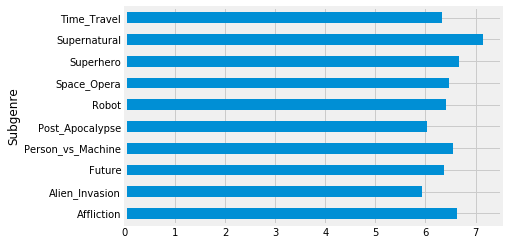

In [73]:
#Subgenre breakout of the top 10 most popular sci-fi films? (popularity determined by rating or by revenue generated

sci_fi_df.groupby('Subgenre')['Vote_Average'].mean().plot(kind='barh')


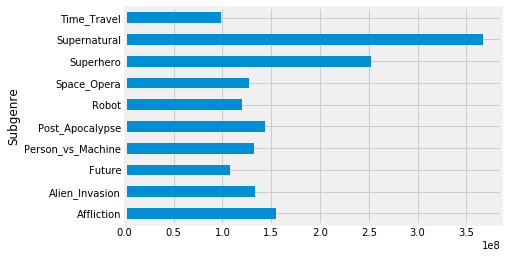

In [74]:
sci_fi_df.groupby('Subgenre')['Revenue'].mean().plot(kind='barh')

In [56]:
#What is the average total revenue of all the films? Grouped by subgenres? Grouped by decade?

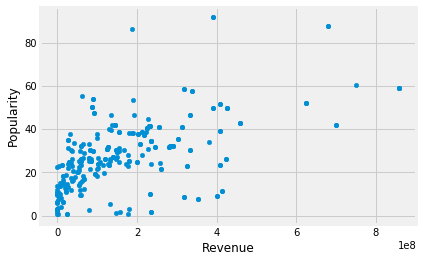

In [79]:
#What is the correlation of revenue and popularity?
#Popularity has a higher correlation with revenue 

sci_fi_df.plot(kind='scatter',x='Revenue',y='Popularity')

In [80]:
sci_fi_df['Revenue'].corr(sci_fi_df['Vote_Average'])

0.47456555419442137

In [81]:
sci_fi_df['Revenue'].corr(sci_fi_df['Popularity'])

0.5884113320857994

<BarContainer object of 10 artists>

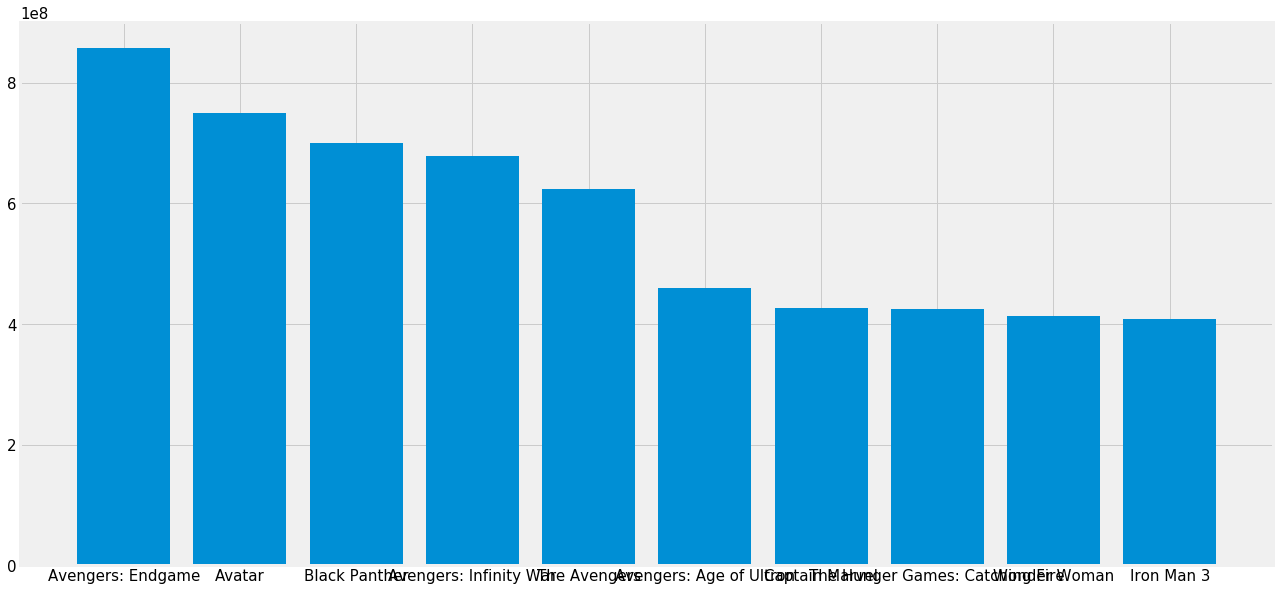

In [123]:
#top 10 sci fi movies
top_10=sci_fi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False)['Title'].head(10)

top_10_revenue=sci_fi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False)['Revenue'].head(10)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

plt.bar(top_10,top_10_revenue)



In [58]:
#Overall suggestion and final thoughts to Microsoft?



In [59]:
#What is the distribution like?

In [60]:
#Are there any outliers?


In [ ]:
#How do the different sub genre differ from one another in terms of success? Is there a correlation between them?